# Making Necessary Imports:

In [284]:
import pandas as pd;

import numpy as np;

import heapq as hq;

from sklearn.preprocessing import LabelEncoder;
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

# configs:
pd.options.display.max_columns = None;

# Initializing the Constants to be Used in The Program: 

In [285]:
# "adult.data" file.
inputDataURL = "https://raw.githubusercontent.com/Aditya-163/MLDA-1-Project-1/main/Data/adult.data"; 
# "adult.test" file.
testDataURL = "https://raw.githubusercontent.com/Aditya-163/MLDA-1-Project-1/main/Data/adult.test";

# Attributes in the data.
colNames = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","income"]; 
numAttrs = ["age","fnlwgt","education-num","capital-gain","capital-loss","hours-per-week"];
nominalAttrs = ["workclass","education","marital-status","occupation","relationship","race","sex","native-country","income"];
outputAttr = ["income"];
colNamesWithoutIncome = ["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country"];

# Number of Nominal Attributes!
numOfNominalAttrs = 8; 
# Number of Ordinal Attributes!
numOfOrdinalAttrs = 0;
# Number of Numerical Attribute!
numOfNumAttrs = 6;

# Reading The Required Data:

In [286]:
# Training Data.
inputData = pd.read_csv(inputDataURL, names=colNames);
print("Some rows from the input data are shown below:");
print(inputData.head());

# Test Data.
testData = pd.read_csv(testDataURL, names=colNames);

Some rows from the input data are shown below:
   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174      

# Pre-Processing The Data:

### Process the data points with either missing or inconsistent values!

In [288]:
# Process the in-complete or inconsistent data!

# Removing duplicate data points!
# inputData.drop_duplicates(); # How to remove duplicate values?

# Removing data points with missing values. 
inputDataWithUnkownValuesRemoved = inputData;
inputDataWithUnkownValuesRemoved = inputDataWithUnkownValuesRemoved[inputDataWithUnkownValuesRemoved['workclass'] != " ?"];
inputDataWithUnkownValuesRemoved = inputDataWithUnkownValuesRemoved[inputDataWithUnkownValuesRemoved['occupation'] != " ?"];
inputDataWithUnkownValuesRemoved = inputDataWithUnkownValuesRemoved[inputDataWithUnkownValuesRemoved['native-country'] != " ?"]; 
print("Number of Input Data Points:");
print(inputData.shape[0]);

inputData = inputDataWithUnkownValuesRemoved;
print("Number of Input Data Points after data points with unkown values are removed:");
print(inputDataWithUnkownValuesRemoved.shape[0]);

Number of Input Data Points:
32561
Number of Input Data Points after data points with unkown values are removed:
30162


### Normalizing Numerical Data:

In [289]:
inputDataWithNumericValues = inputData[numAttrs];
minValsOfInputDataWithNumericValues = inputData[numAttrs].min();
maxValsOfInputDataWithNumericValues = inputData[numAttrs].max();
normalizedInputDataWithNumericValues = (inputDataWithNumericValues - minValsOfInputDataWithNumericValues)/(maxValsOfInputDataWithNumericValues - minValsOfInputDataWithNumericValues);
inputData[numAttrs] = normalizedInputDataWithNumericValues;
print("Input Data After Normalizing Numeric Columns:");
print(inputData[numAttrs].head());

Input Data After Normalizing Numeric Columns:
        age    fnlwgt  education-num  capital-gain  capital-loss  \
0  0.301370  0.043338       0.800000       0.02174           0.0   
1  0.452055  0.047277       0.800000       0.00000           0.0   
2  0.287671  0.137244       0.533333       0.00000           0.0   
3  0.493151  0.150212       0.400000       0.00000           0.0   
4  0.150685  0.220703       0.800000       0.00000           0.0   

   hours-per-week  
0        0.397959  
1        0.122449  
2        0.397959  
3        0.397959  
4        0.397959  


### PCA on Numeric Data:

                     PC0       PC1       PC2       PC3       PC4       PC5
age             0.888160  0.443016 -0.107533 -0.029764 -0.021204  0.044825
fnlwgt         -0.040197  0.003259  0.002356 -0.000644  0.350978  0.935512
education-num   0.411770 -0.884596 -0.204466 -0.042939 -0.051402  0.040545
capital-gain    0.060823 -0.042908  0.030750 -0.115998  0.927748 -0.345459
capital-loss    0.060218 -0.036439  0.037715  0.990755  0.103731 -0.035616
hours-per-week  0.180763 -0.134343  0.971729 -0.047110 -0.047397  0.023537


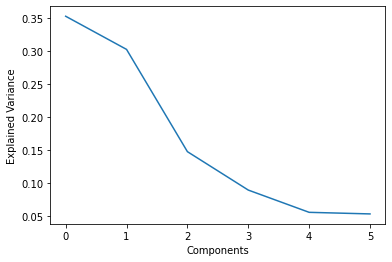

In [290]:
inputDataWithNumericValues = inputData[numAttrs];
pca = PCA(n_components=inputDataWithNumericValues.shape[1])
pca.fit(inputDataWithNumericValues)

# Reformat and view results
loadings = pd.DataFrame(pca.components_.T,
columns=['PC%s' % _ for _ in range(len(inputDataWithNumericValues.columns))],
index=inputDataWithNumericValues.columns)
print(loadings)

plt.plot(pca.explained_variance_ratio_);
plt.ylabel('Explained Variance');
plt.xlabel('Components');
plt.show();

### Encoding the nominal variables!

In [291]:
# Write code to encode the nominal variable classes into useful classes!

# sex:
sexAttrEncoder = LabelEncoder();
sexAttrEncoder.fit(inputData['sex']);
encodedSexAttrValues = sexAttrEncoder.transform(inputData['sex']);
print("sex' attribute values before encoding:");
print(inputData['sex'].head());
inputData['sex'] = encodedSexAttrValues; 
# Encoding: Male = 1, Female = 0;
print("Encoded 'sex' attribute:");
print(inputData['sex'].head());

# income:
incomeAttrEncoder = LabelEncoder();
incomeAttrEncoder.fit(inputData['income']);
encodedIncomeAttrValues = incomeAttrEncoder.transform(inputData['income']);
print("Income values before encoding:");
print(inputData['income'].head());
inputData['income'] = encodedIncomeAttrValues; 
# Encoding: >50k = 1, <=50K = 0;
print("Encoded 'income' attribute:");
print(inputData['income'].head());


sex' attribute values before encoding:
0       Male
1       Male
2       Male
3       Male
4     Female
Name: sex, dtype: object
Encoded 'sex' attribute:
0    1
1    1
2    1
3    1
4    0
Name: sex, dtype: int64
Income values before encoding:
0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: income, dtype: object
Encoded 'income' attribute:
0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int64


# Information From the Data:

In [292]:
# Ouput Some Information Regarding the Data, like: Size of the data, number of atteributes, 
# number of differen values of each attribue, mean/ median/ mode, number of data points corrected etc.

# For Heat maps: https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec

# Utility Functions:

**Function to Compute the distance** between 2 data points:

The function (**or metric**) used to compute the distance is:

**WRITE THE FUNCTION/METRIC USED.**

In [293]:
def distance(testDataRow, inputDataRow):
  
  dist = 0;

  for attr in colNamesWithoutIncome:
    break; # Write the actual code!
  
  return dist;


**Function to Classify** a test data point:

In [294]:
def classify(k, testDataRow, inputData):
  
  distances = list();
  hq.heapify(distances);
  computationNumber = 0;

  for index, inputDataRow in inputData.iterrows():
    distBtwPoints = distance(testDataRow,inputDataRow);
    hq.heappush(distances,(distBtwPoints, computationNumber, inputDataPoint["income"]));
    computationNumber = cumputationNumber + 1;

  numOfNNWithLessIncome = 0;
  numOfNNWithMoreIncome = 0;

  for i in range(k):
    heapTuple = hq.heappop(distances);
    if heapTuple[2] == encodedGreaterThanFTK:
      numOfNNWithMoreIncome = numOfNNWithMoreIncome + 1;
    else:
      numOfNNWithLessIncome = numOfNNWithLessIncome + 1;
  
  if numOfNNWithLessIncome >= numOfNNWithMoreIncome:
    return encodedLessThanOrEqualFTK;
  else:
    return encodedGreaterThanFTK;
    

**Function to perfrom KNN** classification for a given k, input data and the test data:

In [295]:
def knn(k,testData,inputData):

  correctClassifications = 0;
  wrongClassifications = 0;

  for index, testDataRow in testData.iterrows():
    classifiedClass = classify(k,testDataRow,inputData);
    if classifiedClass == testDataRow["income"]:
      correctClassifications = correctClassifications + 1;
    else:
      wrongClassifications = wrongClassifications + 1;

  accuracy = (correctClassifications*100)/(correctClassifications + wrongClassifications);
  return accuracy;
  

**Function to Output the Results:**

In [296]:
def showResults(accuracyAndKData): # accuracyAndKData should be of the form = (k,accuracyForK)

  print("The observed accuracies of the k-NN classifier for different values of k are plotted below:");
  # Make a plot of k vs accuracy!

  return ;


# Main (or the driver) code:

This is the **main** Python code that makes use of above funtions to perfrom KNN based classification with multiple different values of k.

In [297]:
def main():

  kAndAccuracy = list();
  
  kMin = 2;
  kStep = 2;
  kMax = 100;
  
  for k in range(kMin,kStep,kMax):
    accuracy = knn(k,testData,inputData);
    kAndAccuracy.append((k,accuracy));

  showResults(kAndAccuracy);
  
  return ;
  

# Calling The Main Function:

In [298]:
main();


The observed accuracies of the k-NN classifier for different values of k are plotted below:
